<a href="https://colab.research.google.com/github/AdityaPaliwal1/ML-Labs/blob/main/DATA_PREPROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Discrete: Discrete data takes on distinct, separate values. These values are often counted and are typically integers. For example, the number of students in a class, the number of cars in a parking lot, or the count of emails in your inbox are all examples of discrete data.

Continuous: Continuous data can take on an infinite number of values within a given range. These values can be measured with great precision. Examples include height, weight, temperature, or time. Continuous data is often represented by real numbers and can be measured to any desired level of precision.

*   List item
*   List item



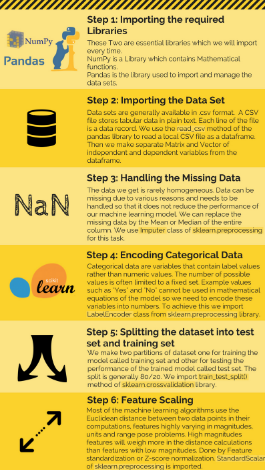

Step 1: Importing the libraries



NumPy (import numpy as np):


*   NumPy is a powerful library for numerical and mathematical operations in Python.

*   It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

*   The alias np is a commonly used shorthand for NumPy, making it easier to reference in your code.

> Indented block



Example

import numpy as np

arr = np.array([1, 2, 3])


Pandas (import pandas as pd):

*   Pandas is a library for data manipulation and analysis. It provides data structures like Series (It is a one-dimensional array holding data of any type) and DataFrame, which are powerful tools for handling and analyzing structured data.

*   Pandas is often used in conjunction with NumPy to handle and process data efficiently.

*   The alias pd is a common convention when importing Pandas, making it more convenient to use in code.

import pandas as pd

data = {'Name': ['John', 'Alice', 'Bob'],
        'Age': [25, 28, 22]}

df = pd.DataFrame(data)


In [ ]:
import numpy as np
import pandas as pd

Step 2: Importing dataset

The code you provided is reading a CSV file named 'Data.csv' using Pandas and then extracting values to create variables X and Y. Let's break down the code:

dataset = pd.read_csv('Data.csv')

This line uses the read_csv function from the Pandas library to read the contents of a CSV file named 'Data.csv' into a DataFrame. The DataFrame is assigned to the variable- dataset.

X = dataset.iloc[:, :-1].values


*   This line uses the iloc function to select specific rows and columns from the DataFrame. iloc[:, :-1] selects all rows and all columns except the last one.

*  The .values attribute is then used to convert the selected data into a NumPy array. The resulting array is assigned to the variable X.


*  This is commonly done when you have a dataset, and you want to extract the independent variables or features.

In [4]:
dataset = pd.read_csv("/content/Data .csv")
X = dataset.iloc[ : , :-1].values
Y = dataset.iloc[ : , 3].values

Step 3: Handling the missing data

from sklearn.impute import SimpleImputer

This line imports the SimpleImputer class from scikit-learn's impute module. The SimpleImputer class is used for imputing (filling in) missing values in datasets.

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

This line creates an instance of the SimpleImputer class with the following parameters:

*   missing_values: Specifies the type of missing values to be imputed. Here, it's set to np.nan, indicating that it will replace NaN values.

*   strategy: Specifies the imputation strategy. In this case, it's set to 'mean', meaning missing values will be replaced with the mean of the non-missing values in the respective columns.

imputer = imputer.fit(X[:, 1:3])

This line fits the imputer on the specified columns of the feature matrix X (columns 1 to 2, as Python uses 0-based indexing).

The imputer learns the mean value for each column from the non-missing values in those columns.

X[:, 1:3] = imputer.transform(X[:, 1:3])

This line transforms (fills in) the missing values in the selected columns of X using the mean values learned during the fitting step.

The transformed values are then assigned back to the corresponding columns of X, effectively replacing the missing values with their respective column means.


In [5]:
from sklearn.impute import SimpleImputer

# Assuming X is your feature matrix
# Create an instance of SimpleImputer with the desired parameters
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the selected columns (1 to 2 in this case) of X
imputer = imputer.fit(X[:, 1:3])

# Transform and replace the missing values in the selected columns of X
X[:, 1:3] = imputer.transform(X[:, 1:3])


Step 4: Encoding categorical data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

This line imports two classes from scikit-learn's preprocessing module: LabelEncoder and OneHotEncoder. These classes are used for encoding categorical variables.

labelencoder_X = LabelEncoder()

This line creates an instance of the LabelEncoder class. The LabelEncoder is used to encode categorical labels with numerical values.

X[:, 0] = labelencoder_X.fit_transform(X[:, 0])


*   X[:, 0] selects all rows of the first column of the feature matrix X (assuming 0-based indexing).

*   labelencoder_X.fit_transform(...) applies the fit_transform method of the LabelEncoder to the selected column.


*   The fit_transform method fits the encoder on the unique values in the selected column and transforms those values into numerical labels. The transformed labels are then assigned back to the original column in the feature matrix.


In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[ : , 0] = labelencoder_X.fit_transform(X[ : , 0])



*   OneHotEncoder is used to convert categorical variables into a binary matrix
(dummy variables).

*   categorical_features=[0] specifies that the transformation should be applied to the first column (index 0) of the feature matrix X.

*   fit_transform is used to fit the encoder on the specified column and transform it into a binary matrix.

*   .toarray() converts the sparse matrix produced by fit_transform into a dense NumPy array.

The purpose of using OneHotEncoder is to handle categorical variables with more than two categories (non-binary) and avoid introducing unintended ordinal relationships.

After executing this code:

X will contain the transformed feature matrix with one-hot encoded columns.

Y will contain the transformed target variable with numerical labels.

In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-Hot Encoding for Feature Matrix (X)
onehotencoder = OneHotEncoder(categories='auto', sparse_output=False, drop='first')
X = onehotencoder.fit_transform(X)



labelencoder_Y = LabelEncoder()
Y =  labelencoder_Y.fit_transform(Y)

from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Sample data
data = np.array([['red', 'square'],
                 ['blue', 'circle'],
                 ['green', 'triangle']])

# Initialize OneHotEncoder with sparse=False
onehotencoder = OneHotEncoder(categories='auto', sparse=False)

# Fit and transform the data
result = onehotencoder.fit_transform(data)

print("Original data:")
print(data)
print("\nOne-Hot Encoded data (dense):")
print(result)


Original data:
[['red' 'square']
 ['blue' 'circle']
 ['green' 'triangle']]

One-Hot Encoded data (dense):
[[0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1.]]


In [8]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

**Step 5: Splitting the datasets into training sets and Test sets**

from sklearn.model_selection import train_test_split

This line imports the train_test_split function from scikit-learn's model_selection module. The train_test_split function is commonly used for splitting datasets into training and testing sets.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


X is the feature matrix, and Y is the target variable.
test_size=0.2 specifies that 20% of the data should be used as the test set, and the remaining 80% will be the training set.

random_state=0 sets a seed for the random number generator, ensuring reproducibility. The same seed will result in the same split every time the code is run.

The train_test_split function takes the feature matrix (X) and target variable (Y) and splits them into four parts:

X_train: The training set of features.

X_test: The test set of features.

Y_train: The training set of target values.

Y_test: The test set of target values.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 0)

Step 6: Feature Scaling

from sklearn.preprocessing import StandardScaler

This line imports the StandardScaler class from scikit-learn's preprocessing module. The StandardScaler is used for standardizing feature values by removing the mean and scaling to unit variance.

sc_X = StandardScaler()

This line creates an instance of the StandardScaler class. The scaler will be used to standardize the features.

X_train = sc_X.fit_transform(X_train)

fit_transform is a convenience method that fits the scaler to the training data and transforms the data in one step.

The scaler learns the mean and standard deviation from the training set and then applies the transformation to standardize the features.

X_test = sc_X.fit_transform(X_test)

Similar to the training set, the test set is also standardized. However, it's important to use the mean and standard deviation learned from the training set (X_train) to ensure consistency between the two sets.

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [12]:
X_train

array([[ 2.64575131, -0.77459667,  0.        , -0.37796447, -0.37796447,
        -0.37796447, -0.37796447,  2.64575131, -0.37796447, -0.37796447,
         0.        , -0.37796447,  0.        , -0.37796447, -0.37796447,
         2.64575131, -0.37796447, -0.37796447, -0.37796447,  0.        ],
       [-0.37796447, -0.77459667,  0.        , -0.37796447,  2.64575131,
        -0.37796447, -0.37796447, -0.37796447, -0.37796447, -0.37796447,
         0.        , -0.37796447,  0.        , -0.37796447, -0.37796447,
        -0.37796447,  2.64575131, -0.37796447, -0.37796447,  0.        ],
       [-0.37796447,  1.29099445,  0.        , -0.37796447, -0.37796447,
        -0.37796447, -0.37796447, -0.37796447, -0.37796447, -0.37796447,
         0.        , -0.37796447,  0.        , -0.37796447, -0.37796447,
        -0.37796447, -0.37796447, -0.37796447, -0.37796447,  0.        ],
       [-0.37796447,  1.29099445,  0.        , -0.37796447, -0.37796447,
        -0.37796447,  2.64575131, -0.37796447, -

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

In [14]:
Y_pred = regressor.predict(X_test)

In [15]:
import pandas as pd

# Assuming you have X_test and y_pred from your regression model
# X_test should be a subset of your data that the model hasn't seen

# Convert X_test and y_pred to pandas Series
y_test_series = pd.Series(Y_test, name='Y_test')
y_pred_series =  pd.Series(Y_pred, name='Y_pred')

# Create a DataFrame by concatenating the two Series
result_df = pd.concat([y_test_series, y_pred_series])

# Print the result
print(result_df)

0    0.000
1    0.000
0    0.625
1    0.625
dtype: float64
